# Dataverwerking

## Importeren modules

In [51]:
# For interactive plots
%matplotlib widget

In [52]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import models
from scipy.stats import chi2
import csv
import math as mt

## Data (uit labjournaal) invoeren

In [53]:

list_count_A = []

#pulseheight in mV
L_pulseheight = []


with open('cal_Ge_Na_2.csv', mode='r') as spectrum_Na:
    csv_reader = csv.reader(spectrum_Na)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        list_count_A.append(float(count_A))
        L_pulseheight.append(float(pulseheigt))

### Pandas DataFrame

In [54]:
# Create the Pandas DataFrame with column names are provided explicitly
df = pd.DataFrame({'counts': list_count_A, 
                   'Pulseheight (mV)': L_pulseheight})
 
# Print DataFrame
df

,counts,Pulseheight (mV)
0,0.0,1.911765
1,81.0,5.735294
2,141.0,9.558824
3,531.0,13.382353
4,537.0,17.205882
...,...,...
250,2.0,957.794118
251,0.0,961.617647
252,0.0,965.441176
253,0.0,969.264706


Maxima vinden

In [55]:
max_A1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A1)

max_A2 = max(list_count_A[index_max_A1 + 2:])
index_max_A2 = list_count_A.index(max_A2, index_max_A1 + 2)

# associated pulseheights
pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

Peaks

In [56]:
peaks = pd.DataFrame({'Energy': [511, 1275],
                      'pulseheight': [pulseheight_A1, pulseheight_A2]})

peaks

,Energy,pulseheight
0,511,189.264706
1,1275,468.382353


### Onzekerheid toevoegen

In [57]:
# Error of ??? quantity x ??? in ??? unit ???
peaks['err_ph'] = (L_pulseheight[3]-L_pulseheight[2]) / 2

# Error of ??? quantity y ??? in ??? unit ???
# peaks['err_E'] = []

# Print DataFrame
peaks

,Energy,pulseheight,err_ph
0,511,189.264706,1.911765
1,1275,468.382353,1.911765


### Diagram

Text(0, 0.5, 'Y-Grootheid ($\\Psi$-eenheid)')

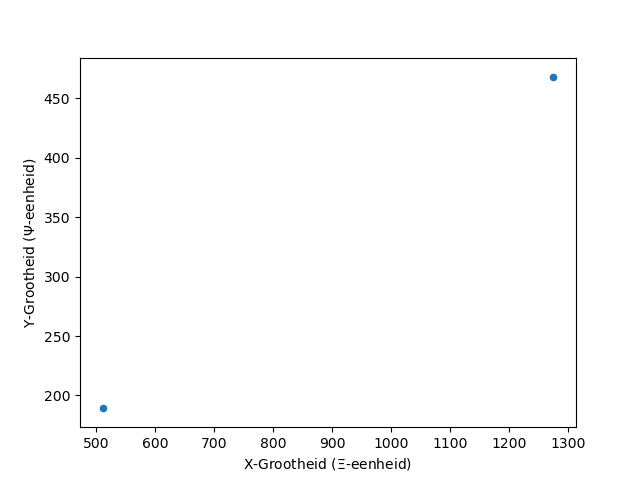

In [58]:
# Create diagram 
ax = peaks.plot.scatter('Energy', 'pulseheight',  yerr='err_ph')

# Set axis labels
ax.set_xlabel('X-Grootheid ($\\Xi$-eenheid)')
ax.set_ylabel('Y-Grootheid ($\\Psi$-eenheid)')

# Set axis view limits
# ax.set_xlim(0, 28)
# ax.set_ylim(0, 28)

## Fitten

\begin{equation}
grootheid \space y = \text{iets met grootheid x}
\end{equation}

### Fitfunctie in python

In [59]:
# Define fit function
def fit_function (energy, a, b):
    y = a * energy + b
    return y

# Create a model from the fit function
MI_model = models.Model(fit_function, name="Fit Na-22")

### Fitten aan de data

In [60]:
# Use the model to fit the data
fit_result = MI_model.fit(peaks['pulseheight'], energy=peaks['Energy'], weights=1/peaks['err_ph'], a=1, b=0)

### Plot fitresultaat

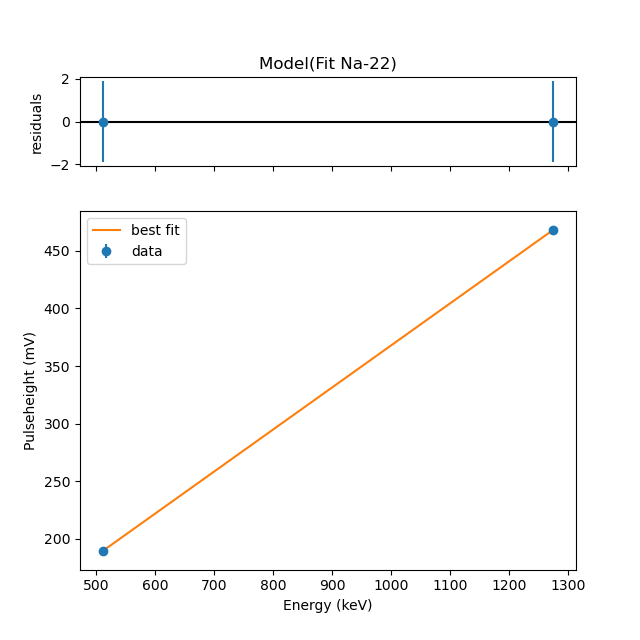

In [61]:
# plot fit including residuals
fit_result.plot()

# Set axis labels
plt.xlabel("Energy (keV)")
plt.ylabel("Pulseheight (mV)")

# Set axis view limits
# plt.xlim(0, 28)
# plt.ylim(0, 28)

# Remove title
plt.title(None);

### Fitresultaat en statistiek

In [62]:
fit_result

Check fit

In [63]:
a = 0.36533723
b = 2.57737912

count_A_Cs = []
pulseheight_Cs = []
with open('cal_Ge_Cs_2.csv', mode='r') as spectrum_Cs:
    csv_reader = csv.reader(spectrum_Cs)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        pulseheight_Cs.append(float(pulseheigt))
        count_A_Cs.append(float(count_A))

peak_A= max(count_A_Cs)
index = count_A_Cs.index(peak_A)
print(peak_A, index)
peak_Ph = pulseheight_Cs[index]
print(peak_Ph)

Energy = (peak_Ph - b)/a

print(Energy)

6445.0 63
242.79411764705884
657.5205558082839


### Pulseheight naar energie plotten 

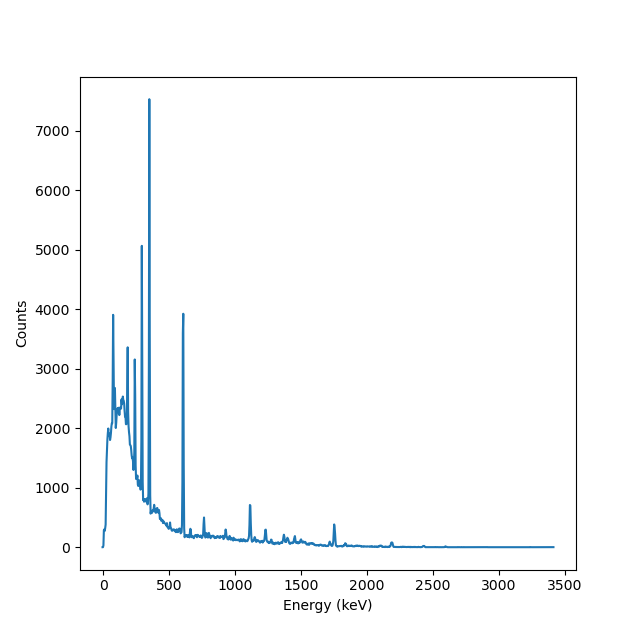

In [64]:
plt.clf()

list_count_A = []
L_pulseheight = []

with open('book4_7200_1024bins.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        list_count_A.append(float(count_A ))
        L_pulseheight.append(((float(pulseheigt) - 2.577)/0.3653))
        # print(count_A)

plt.plot(L_pulseheight, list_count_A, linestyle = 'solid', label = "Book 1")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.show()

achtergrond loesoe

[0.0, 0.0, 15.0, 121.0, 139.0, 105.0, 134.0, 130.0, 279.0, 417.0, 363.0, 507.0, 589.0, 721.0, 583.0, 600.0, 600.0, 554.0, 487.0, 562.0, 550.0, 551.0, 485.0, 970.0, 2005.0, 1202.0, 242.0, 397.0, 391.0, 50.0, -368.0, -383.0, -240.0, -196.0, -235.0, -309.0, -219.0, -204.0, -263.0, -168.0, -168.0, -35.0, -41.0, 197.0, 26.0, 225.0, 334.0, 388.0, 371.0, 424.0, 419.0, 321.0, 384.0, 283.0, 270.0, 426.0, 1091.0, 1778.0, 771.0, 533.0, 438.0, 512.0, 414.0, 403.0, 395.0, 398.0, 325.0, 361.0, 388.0, 329.0, 208.0, 243.0, 234.0, 1940.0, 1611.0, 493.0, 330.0, 370.0, 370.0, 413.0, 282.0, 300.0, 354.0, 396.0, 373.0, 381.0, 321.0, 327.0, 1131.0, 4313.0, 2411.0, 536.0, 228.0, 258.0, 235.0, 264.0, 305.0, 313.0, 281.0, 238.0, 294.0, 311.0, 206.0, 305.0, 443.0, 2534.0, 6889.0, 3124.0, 511.0, 186.0, 259.0, 243.0, 213.0, 270.0, 254.0, 256.0, 302.0, 372.0, 329.0, 277.0, 233.0, 259.0, 317.0, 337.0, 397.0, 331.0, 325.0, 320.0, 305.0, 312.0, 184.0, 234.0, 235.0, 161.0, 207.0, 225.0, 207.0, 180.0, 172.0, 196.0, 161

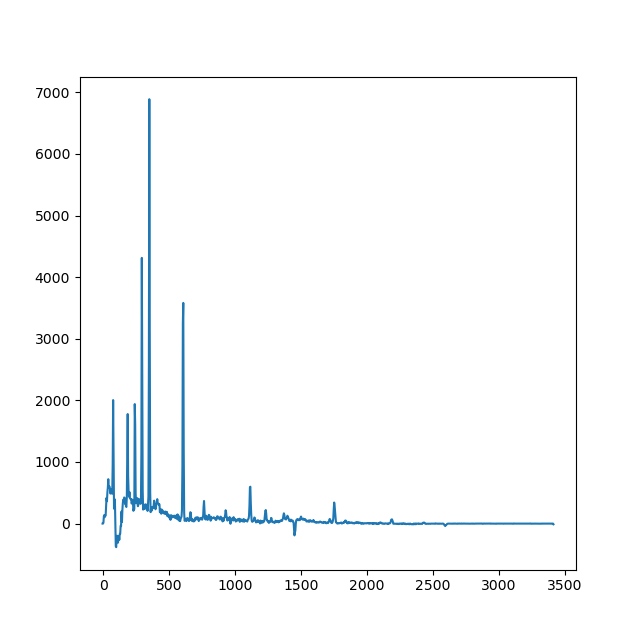

In [72]:
background_counts = []
background_pulseheight = []

with open('background_7200s_1024bins.csv', mode='r') as background:
    csv_reader = csv.reader(background)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        background_counts.append(float(count_A ))
        background_pulseheight.append((float(pulseheigt) - 2.577)/0.3653)

background_removed = []
for i in range(len(list_count_A)):
    verschil = list_count_A[i] - background_counts[i]
    background_removed.append(verschil)

with open('background_removed.csv', mode = 'w', newline = '') as file:
    writer = csv.writer(file)
    writer.writerows(zip(L_pulseheight, background_removed))

print(background_removed)

plt.clf()
plt.plot(L_pulseheight,background_removed)
plt.show()

### Veiligheid test

\begin{equation}
    N(t) = N_0\left(\frac{1}{2}\right)^{\frac{t}{t_\frac{1}{2}}},
\end{equation}

\begin{equation}
t = t_{\frac{1}{2}}log_{\frac{1}{2}}()

In [66]:
N0 = counts
halftime = 
N = N0 * (0.5)^(t/halftime)

t = halftime mt.log((N/N0), 0.5)

SyntaxError: invalid syntax (1953069979.py, line 2)